# 知覚の測定と解析 実験計画書
佐藤 瞭
## 目的
- 視覚情報が数知覚に与える影響を調べる．(具体的にどのような視覚情報を変数とするかは決め兼ねている．)
- たとえば，ポップアウト効果が個数のカウントに及ぼす影響を調べることで，精度よくモノを数えられるような視覚をもたらす作業環境を提案する．
    - 数える対象の形・大きさ
    - 背景の色・模様
    - 数える対象を2種類の図形にして(アルファベットのOとQ，黄色い図形と黒い図形など)数を偏らせる(ポップアウト効果が数知覚に与える影響)
        - http://cog.inf.kyushu-u.ac.jp/~shidoji/japanese/user_interface/2.pdf, p.11.
        - https://www.jstage.jst.go.jp/article/safety/52/2/52_75/_pdf, p.79.

## タスク: 個数のカウント
- 手段
    - 筆者の実装経験のあるJupyter Notebook + ipywidgets をインターフェースとする．(下にモックアップをのせてある．)
    - ボタンを押すかEnterキーを押すなどして記録を追加していき，実験終了時にcsvなどの形式で保存する．
- 手順
    1. 2次元平面上にいくつかの図形(点，正方形など)をランダムにプロットして被験者に見せる．
    2. 被験者に図形の個数を予測して入力してもらう．
    3. プロットのパターンの数だけ1,2を繰り返し，パターンの実行順序と予測個数を被験者ごとに記録する．
- プロットのパターンは実験開始前に固定しておく(図としてまとめて保存しておくか，乱数シードを固定して毎回同じ順序で図を生成してプログラム上の変数として持っておく)
    - 図形がかぶって見えないようにある程度図形同士は離して描画する
- それまでにみたプロットの，図形の数でカウントの結果が変わるようなので( https://core.ac.uk/download/pdf/71799134.pdf )，プロットのパターンの順番を前から行う被験者と後ろから逆順に行う被験者に分ける．
- 調べることと変数の候補(どれか１〜2項目に絞る（？）)
    - 知覚に使える時間と予測精度の関係→図を見せる時間 (0.5s, 1.0s, 1.5s, 2.0s, 2.5s, 3.0s？？)
    - ポップアウト効果の影響→単一図形 VS 2種類の図形
        - 2種類の図形の数の偏りを変えてみる
    - どれくらいの数なら予測精度が落ちないか(精度が「十分高い」と定義するためにしきい値を決める．10個〜30個の1個刻み？)
    - 色と予測精度の関係→図形の色
    - 図形の大きさ
※時間と図形の数，時間と図形の大きさ，といった組み合わせで調べることも考えられる．

## 仮説
- ポップアウト効果があると精度は落ちるのではないか（色や形の情報に注意を奪われるため）
    - （ポップアウト効果がカウントに影響を与えると仮定して）図形が大きいとその影響は大きくなる．（単純に図形たちの占める面積が増えるため．）
- 図を見せる時間と，予測精度が落ちない個数の上限には正の相関がある.


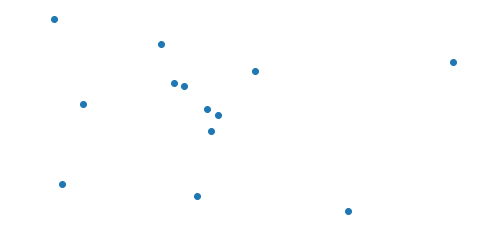

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display 
np.random.seed(20190509)
n = 13
x = np.random.rand(n)
y = np.random.rand(n)
plt.figure(figsize=(8, 4))
plt.scatter(x,y)
plt.axis('off')
plt.show()

In [3]:
input_count = widgets.IntText(
    value=0,
    description='個数を入力してください:',
    disabled=False
)
display(input_count)

IntText(value=0, description='個数を入力してください:')

In [4]:
slider_count = widgets.IntSlider(
    value=15,
    min=5,
    max=25,
    step=1,
    description='個数を入力してください:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(slider_count)

IntSlider(value=15, continuous_update=False, description='個数を入力してください:', max=25, min=5)

↑のように，数値の直接入力やスライダーでの入力ができる．前者の直接入力のほうがよいだろうか…？